# Bilag 2 - Forbehandling

In [89]:
import os
import sys
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm

In [90]:
# Tilføj biblioteket et niveau over til sys.path
HELPERS_PATH = os.path.abspath("..")
if not HELPERS_PATH in sys.path:
    sys.path.append(HELPERS_PATH)
    
from Helpers.GeneralHelpers import *

In [91]:
IMAGE_PATH = os.path.expanduser("~/datasets/RHD/RHD_published_v2/training/color")

In [92]:
samples = get_all_samples(IMAGE_PATH, sample_type='png')

# Tilfældig sample
sample = np.random.choice(samples)
print(f"Sample: {sample}")
# Sammensæt sti
image_name = "%05d.png" % sample
sample_path = os.path.join(IMAGE_PATH, image_name)
print(f"Sample sti: {sample_path}")

Sample: 4264
Sample sti: /home/clh/datasets/RHD/RHD_published_v2/training/color/04264.png


Indlæs sample

In [93]:
im = cv2.imread(sample_path)

Og lad os vise det, så vi er sikre på det er fat i noget korrekt.

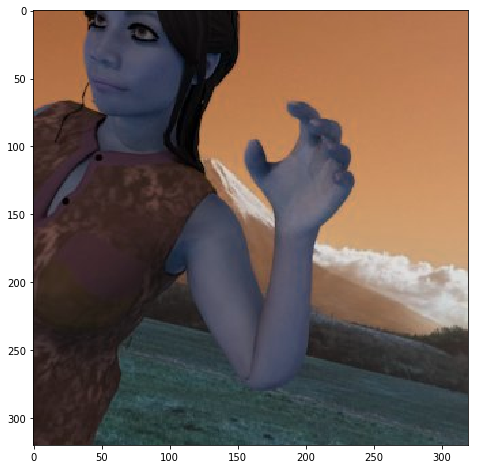

In [94]:
f = plt.figure(figsize=(10, 8))
plt.imshow(im)
plt.show()

Farverne ser her forkerte ud. Dette er fordi OpenCV læser billeder i et BGR format, istedet for RGB, som matplotlib bruger til at vise dem (og som er noget mere normalt at arbejde med).

Vi ønsker dog billeder i gråskalering, så lad is konvertere til det.

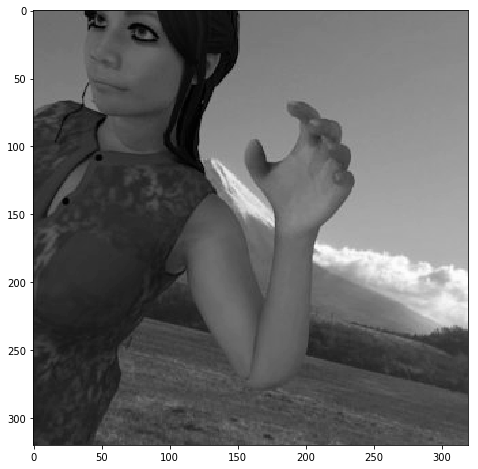

In [123]:
f = plt.figure(figsize=(10, 8))
im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
plt.imshow(im_gray, cmap='gray')
plt.show()

Billedet ser nu forståeligt ud. Lad os tage et kig på, hvad data vi har med at gøre.

In [115]:
print(f"Minimum værdi: {np.min(im_gray)}")
print(f"Maximum værdi: {np.max(im_gray)}")
print(f"Data type: {im_gray.dtype}")

Minimum værdi: 0.0
Maximum værdi: 0.8745098039215686
Data type: float64


Vi plotter et histogram med data, for at se fordelingen.

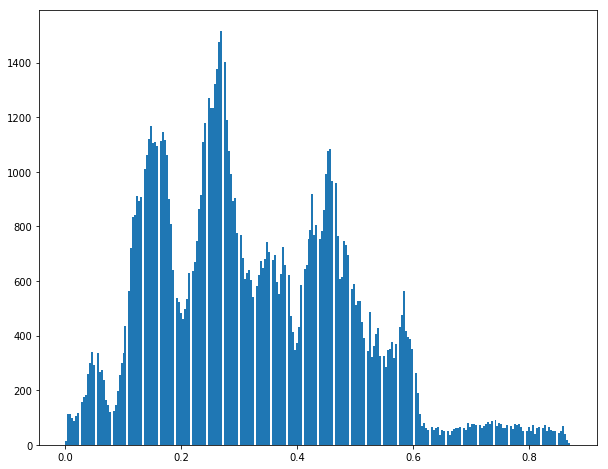

In [116]:
f = plt.figure(figsize=(10, 8))
hist = plt.hist(im_gray.reshape(-1), bins=255)

Vi ønsker at behandle dette en smule.<br>
For det første, ønske vi at centrere data omkring 0. Dette gøres med gennemsnites fratrækning.

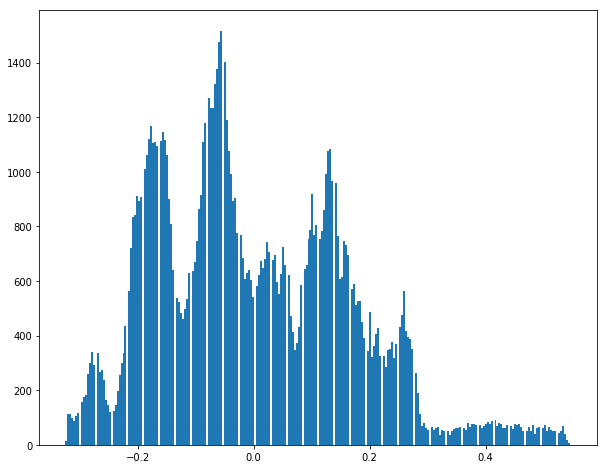

In [117]:
f = plt.figure(figsize=(10, 8))
im_gray_mean = im_gray - np.mean(im_gray)
norm_hist = plt.hist(im_gray_mean.reshape(-1), bins=255)

In [118]:
print(f"Gennemsnit: {np.mean(im_gray_mean)}")

Gennemsnit: -3.7192471324942746e-17


Så det ses, at gennemsnittet er meget tæt på 0.

Herefter ønske vi at normalisere data, hvor vi vil give det en standard deviation på 1. Dette siger noget om hvordan data er fordelt omkring midtpunktet, 0 i vores tilfælde.

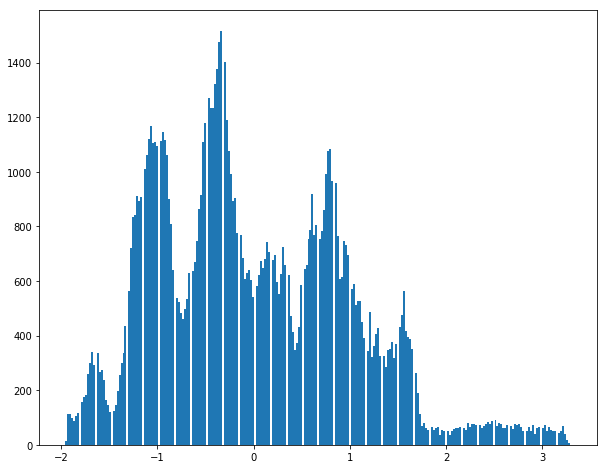

In [119]:
f = plt.figure(figsize=(10, 8))
im_gray_norm = im_gray_mean / np.std(im_gray_mean)
norm_hist = plt.hist(im_gray_norm.reshape(-1), bins=255)

In [120]:
print(f"Gennemsnit: {np.mean(im_gray_norm)}")
print(f"STD: {np.std(im_gray_norm)}")

Gennemsnit: -2.1316282072803005e-16
STD: 1.0


Vi plotter billedet en sidste gang, for at være sikker på der ikke er gået noget galt.

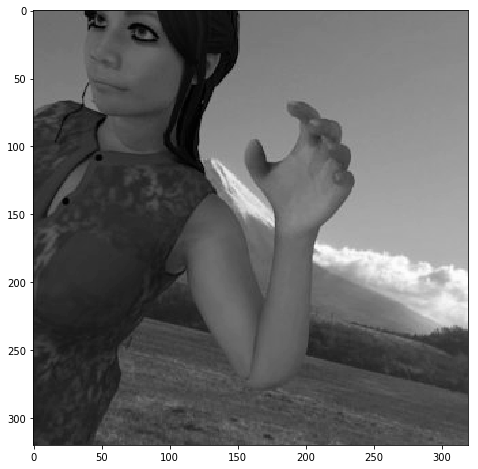

In [121]:
f = plt.figure(figsize=(10, 8))
plt.imshow(im_gray_norm, cmap='gray')

Som det kan ses, er billedet stadig ganske genkendeligt, man data er nu i et format der er meget bedre for det neurale netværk.

In [122]:
print(f"min: {np.min(im_gray_norm)}")
print(f"max: {np.max(im_gray_norm)}")
print(f"dtype: {im_gray_norm.dtype}")
print(f"mean: {np.mean(im_gray_norm)}")
print(f"std: {np.std(im_gray_norm)}")

min: -1.961853503478042
max: 3.3075286053116306
dtype: float64
mean: -2.1316282072803005e-16
std: 1.0
